## Spam Mail Detection

Dataset :


Kaggle (https://www.kaggle.com/datasets/shantanudhakadd/email-spam-detection-dataset-classification)


kaggle : (https://www.kaggle.com/datasets/yashpaloswal/spamham-email-classification-nlp)

### Problem Type:
Binary Classification Problem 


### Goal to Achieve : 
is the mail spam or ham


### Algorithms for Binary Classification Problems :

### Train Test Approach

1-Naive Bayes         

2-Support Vector Machines (SVM)       

3-Logistic Regression             

4-Random Forest                        

5-Gradient Boosting Machines (e.g., XGBoost, LightGBM)        

6-Decision Trees  

7-K-Nearest Neighbors (KNN)   

8-Neural Networks (e.g., Multi-Layer Perceptron) 

9-AdaBoost 

10-Preceptron 



# Importing 

In [54]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import Perceptron
from sklearn.metrics import  f1_score,accuracy_score,precision_score,recall_score,confusion_matrix,make_scorer
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_validate




Data Collection and Preprocessing 

In [55]:


df2 = pd.read_csv('./emails.csv')
df2 = df2.rename(columns={'Text': 'Message', 'Spam': 'Category'})
# Swap the positions of the second and first columns
df2 = df2.iloc[:, [1, 0] + list(range(2, len(df2.columns)))]
# Remove characters before ':' in the message
df2['Message'] = df2['Message'].str.replace(r'.*:', '', regex=True)


df2.drop_duplicates(inplace=True)
df2.shape



(4444, 2)

In [56]:
# reading the data from csv 
df = pd.read_csv('./mail_data.csv')
df





,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [57]:
df.describe()

,Category,Message
count,5572,5572
unique,2,5157
top,ham,"Sorry, I'll call later"
freq,4825,30


In [58]:
df['Category'].value_counts()

ham     4825
spam     747
Name: Category, dtype: int64

Unbalance Dataset

In [59]:
dfle = LabelEncoder()
df['Category'] = dfle.fit_transform(df['Category'])

# ham -> 0 , spam -> 1

In [60]:
# counting the total null in dataset
null_counts = df.isnull().sum()
null_counts

Category    0
Message     0
dtype: int64

In [61]:
df.drop_duplicates(inplace=True)
df.shape

(5157, 2)

In [62]:
result=pd.concat([df,df2], ignore_index=True)
result.to_csv('MergeEmailDataset.csv',index=False)
result.shape


(9601, 2)

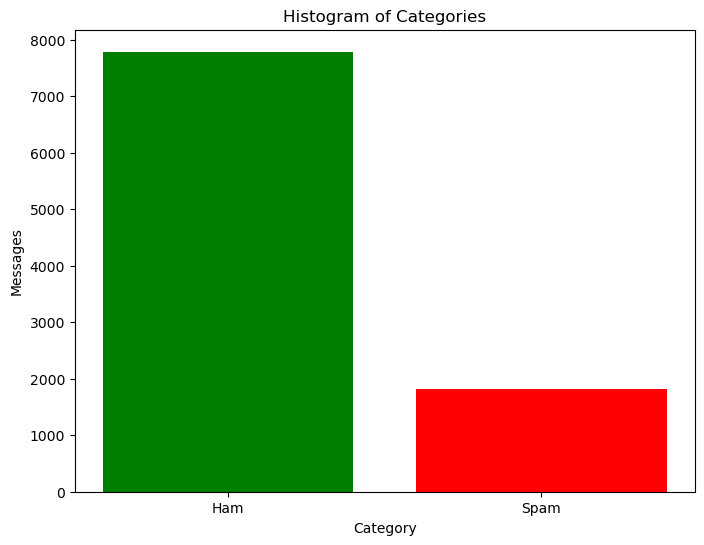

In [63]:

# Count the number of messages in each category
category_counts = result['Category'].value_counts()

# Create the histogram plot
plt.figure(figsize=(8, 6))
plt.bar(category_counts.index, category_counts.values, color=['green', 'red'])
plt.xlabel('Category')
plt.ylabel('Messages')
plt.xticks(category_counts.index, ['Ham', 'Spam'])
plt.title('Histogram of Categories')
plt.show()


In [64]:
result['Category'].value_counts()

0    7789
1    1812
Name: Category, dtype: int64

In [65]:

# Separate instances for each class
class_0 = result[result['Category']==0]
class_1 = result[result['Category']==1]

# Randomly sample 8500 instances from class 0
class_0_sampled = class_0.sample(n=2000, random_state=42)

# Combine the sampled instances with all instances of class 1
balanced_df = pd.concat([class_0_sampled, class_1])

# Shuffle the rows in the DataFrame
balanced_df = balanced_df.sample(frac=1, random_state=42)

# Save the balanced DataFrame to a new CSV file
balanced_df.to_csv('balanced_dataset.csv', index=False)


In [66]:
balanced_df['Category'].value_counts()

0    2000
1    1812
Name: Category, dtype: int64

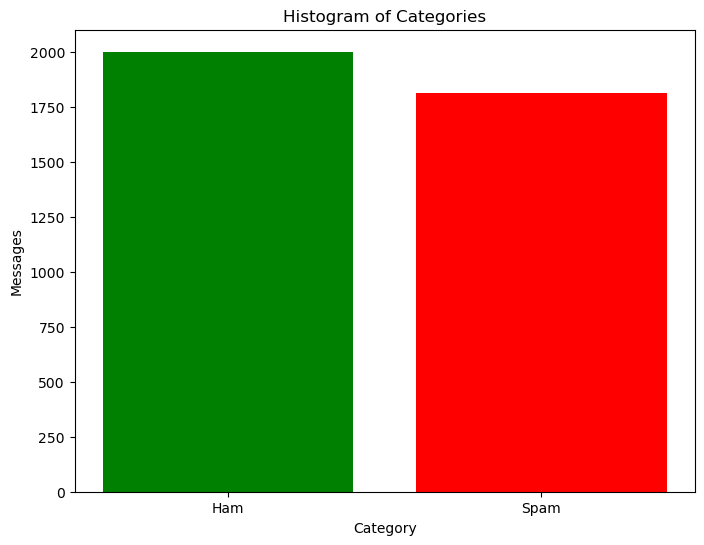

In [67]:

# Count the number of messages in each category
category_counts = balanced_df['Category'].value_counts()

# Create the histogram plot
plt.figure(figsize=(8, 6))
plt.bar(category_counts.index, category_counts.values, color=['green', 'red'])
plt.xlabel('Category')
plt.ylabel('Messages')
plt.xticks(category_counts.index, ['Ham', 'Spam'])
plt.title('Histogram of Categories')
plt.show()


Totally Unbalance Dataset

In [68]:
# seperating the data as test and label 

x = balanced_df['Message']
y = balanced_df['Category']



In [69]:
print(x)

5495     / / www . retdehola . com / ss /  the biggest...
4085    Do you want a new Video handset? 750 any time ...
6695      the research group will have 5 rice students...
6000     1  soft viagra at $ 1 . 62 per dose  ready to...
8196     var article  les ,  the revised version of th...
                              ...                        
2721    Ok that would b lovely, if u r sure. Think abo...
8490                             > test  >  > vince  >  >
7817     work at enron  hi , vince  i just wanted to t...
6023     learn to build simple and clean websites that...
5690                                                   55
Name: Message, Length: 3812, dtype: object


In [70]:
print(y)

5495    1
4085    1
6695    0
6000    1
8196    0
       ..
2721    0
8490    0
7817    0
6023    1
5690    1
Name: Category, Length: 3812, dtype: int64


# Train Test Split  Approach

In [71]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.33,random_state=3,shuffle=True)


In [72]:
print(x.shape)
print(x_train.shape)
print(x_test.shape)

(3812,)
(2554,)
(1258,)


## Feature Extraction 

In [73]:
feature_extraction = TfidfVectorizer(min_df=1,stop_words='english',lowercase='True')

X_train_feature = feature_extraction.fit_transform(x_train)
X_test_feature = feature_extraction.transform(x_test)

print(X_train_feature)


  (0, 8003)	0.16247373486075697
  (0, 12469)	0.17263369463762235
  (0, 10973)	0.17109014623622162
  (0, 11012)	0.13982947983947425
  (0, 10974)	0.17185314952036132
  (0, 261)	0.27680089442887856
  (0, 1045)	0.2630344549906858
  (0, 503)	0.27680089442887856
  (0, 3527)	0.27680089442887856
  (0, 12236)	0.27680089442887856
  (0, 14173)	0.1253691023159815
  (0, 13714)	0.15707313579172422
  (0, 1494)	0.21892091684295428
  (0, 4152)	0.21892091684295428
  (0, 10971)	0.27680089442887856
  (0, 11658)	0.24569079243520006
  (0, 12235)	0.27680089442887856
  (0, 8632)	0.24569079243520006
  (0, 5916)	0.12421152824546293
  (0, 6484)	0.25326701076758207
  (1, 7548)	0.23553714238446533
  (1, 13684)	0.17735015310261262
  (1, 12454)	0.31514539084448756
  (1, 7268)	0.2746187716997932
  (1, 5164)	0.17640187147254927
  :	:
  (2549, 10738)	0.1602651515277321
  (2549, 8315)	0.1618282221703198
  (2549, 13874)	0.13917477795461528
  (2549, 8808)	0.1345143333468444
  (2549, 11462)	0.14206329940291726
  (2549, 940

## Logistic Regression Algorithm
 

In [74]:
logReg= LogisticRegression()
logReg.fit(X_train_feature,y_train)

LogisticRegression()

Prediction on train Data (Logistic Regression)

In [75]:
prediction_lr = logReg.predict(X_train_feature)

scores = {
    "F1": f1_score(y_train,prediction_lr),
    "Accuracy": accuracy_score(y_train,prediction_lr),
    "Precision": precision_score(y_train,prediction_lr),
    "Recall": recall_score(y_train,prediction_lr)
}
# Print the evaluation scores
for metric, score in scores.items():
    print(f"{metric}: {score}")

F1: 0.9788994621431527
Accuracy: 0.9800313234142521
Precision: 0.9858333333333333
Recall: 0.9720624486442071


Prediction on Test Data (Logistic Regression)

In [76]:
prediction_lr_test = logReg.predict(X_test_feature)

scores = {
    "F1": f1_score(y_test,prediction_lr_test),
    "Accuracy": accuracy_score(y_test,prediction_lr_test),
    "Precision": precision_score(y_test,prediction_lr_test),
    "Recall": recall_score(y_test,prediction_lr_test)
}
# Print the evaluation scores
for metric, score in scores.items():
    print(f"{metric}: {score}")


F1: 0.9190600522193211
Accuracy: 0.9260731319554849
Precision: 0.9530685920577617
Recall: 0.8873949579831932


## Naive Bayes Algorithm


In [77]:
nb_model = MultinomialNB().fit(X_train_feature,y_train)

Prediction on Test Data (Naive Bayes)

In [78]:
prediction_nb_test=nb_model.predict(X_test_feature)

scores = {
    "F1": f1_score(y_test,prediction_nb_test),
    "Accuracy": accuracy_score(y_test,prediction_nb_test),
    "Precision": precision_score(y_test,prediction_nb_test),
    "Recall": recall_score(y_test,prediction_nb_test)
}
# Print the evaluation scores
for metric, score in scores.items():
    print(f"{metric}: {score}")


F1: 0.9275362318840579
Accuracy: 0.9324324324324325
Precision: 0.9411764705882353
Recall: 0.9142857142857143


Prediction on Train Data (Naive Bayes)

In [79]:
prediction_nb_train=nb_model.predict(X_train_feature)

scores = {
    "F1": f1_score(y_train, prediction_nb_train),
    "Accuracy": accuracy_score(y_train, prediction_nb_train),
    "Precision": precision_score(y_train, prediction_nb_train),
    "Recall": recall_score(y_train, prediction_nb_train)
}
# Print the evaluation scores
for metric, score in scores.items():
    print(f"{metric}: {score}")

F1: 0.9864364981504316
Accuracy: 0.9870790916209867
Precision: 0.9868421052631579
Recall: 0.9860312243221035


## Support Vector Model Algorithm 

In [80]:
svm_model = SVC().fit(X_train_feature,y_train)
svm_model

SVC()

#### Prediction in Train Data (SVM)

In [81]:
# Make predictions on the test data using your SVM model
prediction_svm_train = svm_model.predict(X_train_feature)
# Calculate evaluation scores
scores = {
    "F1": f1_score(y_train, prediction_svm_train),
    "Accuracy": accuracy_score(y_train, prediction_svm_train),
    "Precision": precision_score(y_train, prediction_svm_train),
    "Recall": recall_score(y_train, prediction_svm_train)
}
# Print the evaluation scores
for metric, score in scores.items():
    print(f"{metric}: {score}")

F1: 0.9979482970865818
Accuracy: 0.9980422866092404
Precision: 0.9967213114754099
Recall: 0.9991783073130649


#### Prediction in Test Data (SVM)

In [82]:
prediction_svm_test = svm_model.predict(X_test_feature)

scores = {
    "F1": f1_score(y_test, prediction_svm_test),
    "Accuracy": accuracy_score(y_test, prediction_svm_test),
    "Precision": precision_score(y_test, prediction_svm_test),
    "Recall": recall_score(y_test, prediction_svm_test)
}
# Print the evaluation scores
for metric, score in scores.items():
    print(f"{metric}: {score}")

F1: 0.9185441941074524
Accuracy: 0.9252782193958664
Precision: 0.9481216457960644
Recall: 0.8907563025210085


## Random Forest Algorithm

In [83]:

rf_model = RandomForestClassifier().fit(X_train_feature,y_train)
rf_model

RandomForestClassifier()

Prediction of Train Data Random Forest

In [84]:

# Make predictions on the training data using your Random Forest model
prediction_rf_train = rf_model.predict(X_train_feature)
# Calculate evaluation scores
scores = {
    "F1": f1_score(y_train, prediction_rf_train),
    "Accuracy": accuracy_score(y_train, prediction_rf_train),
    "Precision": precision_score(y_train, prediction_rf_train),
    "Recall": recall_score(y_train, prediction_rf_train)
}
# Print the evaluation scores
for metric, score in scores.items():
    print(f"{metric}: {score}")

F1: 0.9987689782519491
Accuracy: 0.9988253719655442
Precision: 0.9975409836065574
Recall: 1.0


Prediction of Test Data Random Forest

In [85]:
prediction_rf_test=rf_model.predict(X_test_feature)

# Calculate evaluation scores
scores = {
    "F1": f1_score(y_test,prediction_rf_test),
    "Accuracy": accuracy_score(y_test,prediction_rf_test),
    "Precision": precision_score(y_test,prediction_rf_test),
    "Recall": recall_score(y_test,prediction_rf_test)
}
# Print the evaluation scores
for metric, score in scores.items():
    print(f"{metric}: {score}")


F1: 0.9192751235584844
Accuracy: 0.9220985691573926
Precision: 0.901453957996769
Recall: 0.9378151260504202


# Gradient Boosting Machines (e.g., XGBoost, LightGBM) Algorithm

In [86]:
gbm_model = GradientBoostingClassifier().fit(X_train_feature,y_train)
gbm_model

GradientBoostingClassifier()

Prediction on Traning Data GBM

In [87]:
prediction_gbm_train = gbm_model.predict(X_train_feature)
# Calculate evaluation scores
scores = {
    "F1": f1_score(y_train,prediction_gbm_train),
    "Accuracy": accuracy_score(y_train,prediction_gbm_train),
    "Precision": precision_score(y_train,prediction_gbm_train),
    "Recall": recall_score(y_train,prediction_gbm_train)
}
# Print the evaluation scores
for metric, score in scores.items():
    print(f"{metric}: {score}")

F1: 0.8928255093002657
Accuracy: 0.9052466718872357
Precision: 0.968299711815562
Recall: 0.828266228430567


Prediction on testing data GBM

In [88]:
prediction_gbm_test = gbm_model.predict(X_test_feature)

scores = {
    "F1": f1_score(y_test,prediction_gbm_test),
    "Accuracy": accuracy_score(y_test,prediction_gbm_test),
    "Precision": precision_score(y_test,prediction_gbm_test),
    "Recall": recall_score(y_test,prediction_gbm_test)
}
# Print the evaluation scores
for metric, score in scores.items():
    print(f"{metric}: {score}")

F1: 0.8558394160583942
Accuracy: 0.8744038155802861
Precision: 0.936127744510978
Recall: 0.788235294117647


## Decision Tree Algorithm

In [89]:
dt_model = DecisionTreeClassifier().fit(X_train_feature,y_train)
dt_model


DecisionTreeClassifier()

Prediction on Traning Data Decision Tree

In [90]:
prediction_dt_train = dt_model.predict(X_train_feature)

scores = {
    "F1": f1_score(y_train,prediction_dt_train),
    "Accuracy": accuracy_score(y_train,prediction_dt_train),
    "Precision": precision_score(y_train,prediction_dt_train),
    "Recall": recall_score(y_train,prediction_dt_train)
}
# Print the evaluation scores
for metric, score in scores.items():
    print(f"{metric}: {score}")

F1: 0.9987689782519491
Accuracy: 0.9988253719655442
Precision: 0.9975409836065574
Recall: 1.0


Prediction on Testing Data Decision Tree

In [91]:
prediction_dt_test = dt_model.predict(X_test_feature)

scores = {
    "F1": f1_score(y_test,prediction_dt_test),
    "Accuracy": accuracy_score(y_test,prediction_dt_test),
    "Precision": precision_score(y_test,prediction_dt_test),
    "Recall": recall_score(y_test,prediction_dt_test)
}
# Print the evaluation scores
for metric, score in scores.items():
    print(f"{metric}: {score}")

F1: 0.8470031545741326
Accuracy: 0.8457869634340223
Precision: 0.7979197622585439
Recall: 0.9025210084033614


# KNN Algorithm

In [92]:
knn_model = KNeighborsClassifier().fit(X_train_feature,y_train)
knn_model

KNeighborsClassifier()

Prediction on Traning Data KNN

In [93]:
import warnings
# Suppress the future warning
warnings.simplefilter(action='ignore', category=FutureWarning)

prediction_knn_train = knn_model.predict(X_train_feature)
scores = {
    "F1": f1_score(y_train , prediction_knn_train),
    "Accuracy": accuracy_score(y_train , prediction_knn_train),
    "Precision": precision_score(y_train , prediction_knn_train),
    "Recall": recall_score(y_train , prediction_knn_train)
}
# Print the evaluation scores
for metric, score in scores.items():
    print(f"{metric}: {score}")

F1: 0.8043243243243242
Accuracy: 0.7873923257635083
Precision: 0.7163029525032092
Recall: 0.9170090386195563


Prediction on Testing KNN

In [94]:
prediction_knn_test = knn_model.predict(X_test_feature)
accuracy_knn_test = f1_score(y_test , prediction_knn_test )
scores = {
    "F1": f1_score(y_test , prediction_knn_test ),
    "Accuracy": accuracy_score(y_test , prediction_knn_test ),
    "Precision": precision_score(y_test , prediction_knn_test ),
    "Recall": recall_score(y_test , prediction_knn_test )
}
# Print the evaluation scores
for metric, score in scores.items():
    print(f"{metric}: {score}")

F1: 0.6392156862745098
Accuracy: 0.56120826709062
Precision: 0.5229946524064171
Recall: 0.8218487394957983


## Neural Network CLassifier Algorithm

In [95]:
nnc_model = MLPClassifier().fit(X_train_feature,y_train)
nnc_model

MLPClassifier()

Prediction on Traning Data Neuaral Network 

In [96]:
prediction_nnc_train = nnc_model.predict(X_train_feature)
accuracy_nnc_train = f1_score(y_train,prediction_nnc_train)
scores = {
    "F1": f1_score(y_train,prediction_nnc_train),
    "Accuracy": accuracy_score(y_train,prediction_nnc_train),
    "Precision": precision_score(y_train,prediction_nnc_train),
    "Recall": recall_score(y_train,prediction_nnc_train)
}
# Print the evaluation scores
for metric, score in scores.items():
    print(f"{metric}: {score}")

F1: 0.9983539094650207
Accuracy: 0.9984338292873923
Precision: 1.0
Recall: 0.9967132292522597


In [97]:
prediction_nnc_test = nnc_model.predict(X_test_feature)

scores = {
    "F1": f1_score(y_test,prediction_nnc_test),
    "Accuracy": accuracy_score(y_test,prediction_nnc_test),
    "Precision": precision_score(y_test,prediction_nnc_test),
    "Recall": recall_score(y_test,prediction_nnc_test)
}
# Print the evaluation scores
for metric, score in scores.items():
    print(f"{metric}: {score}")

F1: 0.9197952218430033
Accuracy: 0.9252782193958664
Precision: 0.9341421143847487
Recall: 0.9058823529411765


## AdaBoostClassifier Algorithm

In [98]:
abc_model = AdaBoostClassifier().fit(X_train_feature,y_train)
abc_model

AdaBoostClassifier()

Prediction on Traning Data AdaBoostClassifier Algo

In [99]:
prediction_abc_train = abc_model.predict(X_train_feature)
scores = {
    "F1": f1_score(y_train,prediction_abc_train),
    "Accuracy": accuracy_score(y_train,prediction_abc_train),
    "Precision": precision_score(y_train,prediction_abc_train),
    "Recall": recall_score(y_train,prediction_abc_train)
}
# Print the evaluation scores
for metric, score in scores.items():
    print(f"{metric}: {score}")

F1: 0.8909630886720407
Accuracy: 0.8993735317149569
Precision: 0.9210526315789473
Recall: 0.8627773212818406


Prediction on Testing Data AdaBoostClassifier Algo

In [100]:
prediction_abc_test = abc_model.predict(X_test_feature)
scores = {
    "F1": f1_score(y_test,prediction_abc_test),
    "Accuracy": accuracy_score(y_test,prediction_abc_test),
    "Precision": precision_score(y_test,prediction_abc_test),
    "Recall": recall_score(y_test,prediction_abc_test)
}
# Print the evaluation scores
for metric, score in scores.items():
    print(f"{metric}: {score}")

F1: 0.87215411558669
Accuracy: 0.8839427662957074
Precision: 0.9104204753199269
Recall: 0.8369747899159664


## Preceptron

In [101]:
preceptron_model = Perceptron().fit(X_train_feature,y_train)
preceptron_model

Perceptron()

Prediction on Traning Data Preceptron Algo

In [102]:
prediction_precptron_train = preceptron_model.predict(X_train_feature)
accuracy_preceptron_train = f1_score(y_train,prediction_precptron_train)
scores = {
    "F1": f1_score(y_train,prediction_precptron_train),
    "Accuracy": accuracy_score(y_train,prediction_precptron_train),
    "Precision": precision_score(y_train,prediction_precptron_train),
    "Recall": recall_score(y_train,prediction_precptron_train)
}
# Print the evaluation scores
for metric, score in scores.items():
    print(f"{metric}: {score}")

F1: 0.9983539094650207
Accuracy: 0.9984338292873923
Precision: 1.0
Recall: 0.9967132292522597


Prediction on Testing Data Preceptron Algo

In [103]:
prediction_precptron_test = preceptron_model.predict(X_test_feature)
accuracy_preceptron_test = f1_score(y_test,prediction_precptron_test)
scores = {
    "F1": f1_score(y_test,prediction_precptron_test),
    "Accuracy": accuracy_score(y_test,prediction_precptron_test),
    "Precision": precision_score(y_test,prediction_precptron_test),
    "Recall": recall_score(y_test,prediction_precptron_test)
}
# Print the evaluation scores
for metric, score in scores.items():
    print(f"{metric}: {score}")

F1: 0.897370653095844
Accuracy: 0.9038155802861685
Precision: 0.9058219178082192
Recall: 0.8890756302521008


# 10 Fold Validation Approach

SVC

In [104]:

# Assuming you have your features X and labels y ready
k = 10  # Number of folds

# Create an instance of the k-fold cross-validator
kfold = KFold(n_splits=k, shuffle=True, random_state=42)

# Create an instance of your classifier
classifier = SVC()  # Replace with your desired algorithm

# Define the evaluation measures
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score)
}

# Perform cross-validation
results = cross_validate(classifier, X_test_feature, y_test, cv=kfold, scoring=scoring)

# Print the evaluation scores for each fold
for i in range(k):
    print(f"Fold {i+1}:")
    print(f"Accuracy: {results['test_accuracy'][i]}")
    print(f"Precision: {results['test_precision'][i]}")
    print(f"Recall: {results['test_recall'][i]}")
    print(f"F1 Score: {results['test_f1'][i]}")
    print()

# Calculate and print the mean evaluation scores
mean_accuracy = results['test_accuracy'].mean()
mean_precision = results['test_precision'].mean()
mean_recall = results['test_recall'].mean()
mean_f1 = results['test_f1'].mean()

print(f"Mean Accuracy: {mean_accuracy}")
print(f"Mean Precision: {mean_precision}")
print(f"Mean Recall: {mean_recall}")
print(f"Mean F1 Score: {mean_f1}")

Fold 1:
Accuracy: 0.8650793650793651
Precision: 0.9555555555555556
Recall: 0.7413793103448276
F1 Score: 0.8349514563106797

Fold 2:
Accuracy: 0.8888888888888888
Precision: 0.9148936170212766
Recall: 0.8113207547169812
F1 Score: 0.8600000000000001

Fold 3:
Accuracy: 0.8888888888888888
Precision: 0.9827586206896551
Recall: 0.8142857142857143
F1 Score: 0.8906250000000001

Fold 4:
Accuracy: 0.8650793650793651
Precision: 0.9787234042553191
Recall: 0.7419354838709677
F1 Score: 0.8440366972477064

Fold 5:
Accuracy: 0.8968253968253969
Precision: 0.9591836734693877
Recall: 0.8103448275862069
F1 Score: 0.8785046728971961

Fold 6:
Accuracy: 0.8650793650793651
Precision: 0.9795918367346939
Recall: 0.75
F1 Score: 0.8495575221238937

Fold 7:
Accuracy: 0.8571428571428571
Precision: 0.9215686274509803
Recall: 0.7704918032786885
F1 Score: 0.8392857142857142

Fold 8:
Accuracy: 0.8650793650793651
Precision: 0.9111111111111111
Recall: 0.7592592592592593
F1 Score: 0.8282828282828282

Fold 9:
Accuracy: 0.90

KNN

In [105]:

# Assuming you have your features X and labels y ready
k = 10  # Number of folds

# Create an instance of the k-fold cross-validator
kfold = KFold(n_splits=k, shuffle=True, random_state=42)

# Create an instance of your classifier
classifier = KNeighborsClassifier()  # Replace with your desired algorithm

# Define the evaluation measures
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score)
}

# Perform cross-validation
results = cross_validate(classifier, X_test_feature, y_test, cv=kfold, scoring=scoring)

# Print the evaluation scores for each fold
for i in range(k):
    print(f"Fold {i+1}:")
    print(f"Accuracy: {results['test_accuracy'][i]}")
    print(f"Precision: {results['test_precision'][i]}")
    print(f"Recall: {results['test_recall'][i]}")
    print(f"F1 Score: {results['test_f1'][i]}")
    print()

# Calculate and print the mean evaluation scores
mean_accuracy = results['test_accuracy'].mean()
mean_precision = results['test_precision'].mean()
mean_recall = results['test_recall'].mean()
mean_f1 = results['test_f1'].mean()

print(f"Mean Accuracy: {mean_accuracy}")
print(f"Mean Precision: {mean_precision}")
print(f"Mean Recall: {mean_recall}")
print(f"Mean F1 Score: {mean_f1}")

Fold 1:
Accuracy: 0.6428571428571429
Precision: 0.6226415094339622
Recall: 0.5689655172413793
F1 Score: 0.5945945945945946

Fold 2:
Accuracy: 0.5714285714285714
Precision: 0.4918032786885246
Recall: 0.5660377358490566
F1 Score: 0.5263157894736842

Fold 3:
Accuracy: 0.5714285714285714
Precision: 0.6428571428571429
Recall: 0.5142857142857142
F1 Score: 0.5714285714285714

Fold 4:
Accuracy: 0.5396825396825397
Precision: 0.5344827586206896
Recall: 0.5
F1 Score: 0.5166666666666667

Fold 5:
Accuracy: 0.5396825396825397
Precision: 0.5
Recall: 0.5
F1 Score: 0.5

Fold 6:
Accuracy: 0.6428571428571429
Precision: 0.8275862068965517
Recall: 0.375
F1 Score: 0.5161290322580646

Fold 7:
Accuracy: 0.5634920634920635
Precision: 0.5384615384615384
Recall: 0.6885245901639344
F1 Score: 0.6043165467625898

Fold 8:
Accuracy: 0.626984126984127
Precision: 0.5714285714285714
Recall: 0.5185185185185185
F1 Score: 0.5436893203883496

Fold 9:
Accuracy: 0.576
Precision: 0.5689655172413793
Recall: 0.5409836065573771
F

AdaBoostClassifier

In [106]:

# Assuming you have your features X and labels y ready
k = 10  # Number of folds

# Create an instance of the k-fold cross-validator
kfold = KFold(n_splits=k, shuffle=True, random_state=42)

# Create an instance of your classifier
classifier = AdaBoostClassifier()  # Replace with your desired algorithm

# Define the evaluation measures
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score)
}

# Perform cross-validation
results = cross_validate(classifier, X_test_feature, y_test, cv=kfold, scoring=scoring)

# Print the evaluation scores for each fold
for i in range(k):
    print(f"Fold {i+1}:")
    print(f"Accuracy: {results['test_accuracy'][i]}")
    print(f"Precision: {results['test_precision'][i]}")
    print(f"Recall: {results['test_recall'][i]}")
    print(f"F1 Score: {results['test_f1'][i]}")
    print()

# Calculate and print the mean evaluation scores
mean_accuracy = results['test_accuracy'].mean()
mean_precision = results['test_precision'].mean()
mean_recall = results['test_recall'].mean()
mean_f1 = results['test_f1'].mean()

print(f"Mean Accuracy: {mean_accuracy}")
print(f"Mean Precision: {mean_precision}")
print(f"Mean Recall: {mean_recall}")
print(f"Mean F1 Score: {mean_f1}")

Fold 1:
Accuracy: 0.8571428571428571
Precision: 0.9
Recall: 0.7758620689655172
F1 Score: 0.8333333333333334

Fold 2:
Accuracy: 0.8809523809523809
Precision: 0.8958333333333334
Recall: 0.8113207547169812
F1 Score: 0.8514851485148515

Fold 3:
Accuracy: 0.8492063492063492
Precision: 0.9180327868852459
Recall: 0.8
F1 Score: 0.8549618320610688

Fold 4:
Accuracy: 0.8412698412698413
Precision: 0.92
Recall: 0.7419354838709677
F1 Score: 0.8214285714285714

Fold 5:
Accuracy: 0.8412698412698413
Precision: 0.8653846153846154
Recall: 0.7758620689655172
F1 Score: 0.8181818181818181

Fold 6:
Accuracy: 0.8253968253968254
Precision: 0.85
Recall: 0.796875
F1 Score: 0.8225806451612903

Fold 7:
Accuracy: 0.9047619047619048
Precision: 0.9298245614035088
Recall: 0.8688524590163934
F1 Score: 0.8983050847457625

Fold 8:
Accuracy: 0.8492063492063492
Precision: 0.8431372549019608
Recall: 0.7962962962962963
F1 Score: 0.8190476190476189

Fold 9:
Accuracy: 0.848
Precision: 0.875
Recall: 0.8032786885245902
F1 Score

Logistic Regression

In [107]:

# Assuming you have your features X and labels y ready
k = 10  # Number of folds

# Create an instance of the k-fold cross-validator
kfold = KFold(n_splits=k, shuffle=True, random_state=42)

# Create an instance of your classifier
classifier = LogisticRegression()  # Replace with your desired algorithm

# Define the evaluation measures
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score)
}

# Perform cross-validation
results = cross_validate(classifier, X_test_feature, y_test, cv=kfold, scoring=scoring)

# Print the evaluation scores for each fold
for i in range(k):
    print(f"Fold {i+1}:")
    print(f"Accuracy: {results['test_accuracy'][i]}")
    print(f"Precision: {results['test_precision'][i]}")
    print(f"Recall: {results['test_recall'][i]}")
    print(f"F1 Score: {results['test_f1'][i]}")
    print()

# Calculate and print the mean evaluation scores
mean_accuracy = results['test_accuracy'].mean()
mean_precision = results['test_precision'].mean()
mean_recall = results['test_recall'].mean()
mean_f1 = results['test_f1'].mean()

print(f"Mean Accuracy: {mean_accuracy}")
print(f"Mean Precision: {mean_precision}")
print(f"Mean Recall: {mean_recall}")
print(f"Mean F1 Score: {mean_f1}")

Fold 1:
Accuracy: 0.873015873015873
Precision: 0.9375
Recall: 0.7758620689655172
F1 Score: 0.8490566037735848

Fold 2:
Accuracy: 0.8968253968253969
Precision: 0.9
Recall: 0.8490566037735849
F1 Score: 0.8737864077669903

Fold 3:
Accuracy: 0.8809523809523809
Precision: 0.9661016949152542
Recall: 0.8142857142857143
F1 Score: 0.8837209302325583

Fold 4:
Accuracy: 0.8809523809523809
Precision: 0.9795918367346939
Recall: 0.7741935483870968
F1 Score: 0.8648648648648648

Fold 5:
Accuracy: 0.873015873015873
Precision: 0.92
Recall: 0.7931034482758621
F1 Score: 0.851851851851852

Fold 6:
Accuracy: 0.8809523809523809
Precision: 1.0
Recall: 0.765625
F1 Score: 0.8672566371681416

Fold 7:
Accuracy: 0.8968253968253969
Precision: 0.98
Recall: 0.8032786885245902
F1 Score: 0.882882882882883

Fold 8:
Accuracy: 0.8650793650793651
Precision: 0.8936170212765957
Recall: 0.7777777777777778
F1 Score: 0.8316831683168316

Fold 9:
Accuracy: 0.92
Precision: 0.9473684210526315
Recall: 0.8852459016393442
F1 Score: 0.

Naive Bayas

In [108]:

# Assuming you have your features X and labels y ready
k = 10  # Number of folds

# Create an instance of the k-fold cross-validator
kfold = KFold(n_splits=k, shuffle=True, random_state=42)

# Create an instance of your classifier
classifier = MultinomialNB()  # Replace with your desired algorithm

# Define the evaluation measures
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score)
}

# Perform cross-validation
results = cross_validate(classifier, X_test_feature, y_test, cv=kfold, scoring=scoring)

# Print the evaluation scores for each fold
for i in range(k):
    print(f"Fold {i+1}:")
    print(f"Accuracy: {results['test_accuracy'][i]}")
    print(f"Precision: {results['test_precision'][i]}")
    print(f"Recall: {results['test_recall'][i]}")
    print(f"F1 Score: {results['test_f1'][i]}")
    print()

# Calculate and print the mean evaluation scores
mean_accuracy = results['test_accuracy'].mean()
mean_precision = results['test_precision'].mean()
mean_recall = results['test_recall'].mean()
mean_f1 = results['test_f1'].mean()

print(f"Mean Accuracy: {mean_accuracy}")
print(f"Mean Precision: {mean_precision}")
print(f"Mean Recall: {mean_recall}")
print(f"Mean F1 Score: {mean_f1}")

Fold 1:
Accuracy: 0.873015873015873
Precision: 0.875
Recall: 0.8448275862068966
F1 Score: 0.8596491228070176

Fold 2:
Accuracy: 0.9206349206349206
Precision: 0.8909090909090909
Recall: 0.9245283018867925
F1 Score: 0.9074074074074073

Fold 3:
Accuracy: 0.9285714285714286
Precision: 0.9841269841269841
Recall: 0.8857142857142857
F1 Score: 0.9323308270676691

Fold 4:
Accuracy: 0.9047619047619048
Precision: 0.9310344827586207
Recall: 0.8709677419354839
F1 Score: 0.9

Fold 5:
Accuracy: 0.9126984126984127
Precision: 0.9122807017543859
Recall: 0.896551724137931
F1 Score: 0.9043478260869565

Fold 6:
Accuracy: 0.9126984126984127
Precision: 0.9491525423728814
Recall: 0.875
F1 Score: 0.9105691056910569

Fold 7:
Accuracy: 0.9206349206349206
Precision: 0.9473684210526315
Recall: 0.8852459016393442
F1 Score: 0.9152542372881356

Fold 8:
Accuracy: 0.8888888888888888
Precision: 0.8571428571428571
Recall: 0.8888888888888888
F1 Score: 0.8727272727272727

Fold 9:
Accuracy: 0.912
Precision: 0.890625
Recall:

Random Forest

In [109]:

# Assuming you have your features X and labels y ready
k = 10  # Number of folds

# Create an instance of the k-fold cross-validator
kfold = KFold(n_splits=k, shuffle=True, random_state=42)

# Create an instance of your classifier
classifier = RandomForestClassifier()  # Replace with your desired algorithm

# Define the evaluation measures
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score)
}

# Perform cross-validation
results = cross_validate(classifier, X_test_feature, y_test, cv=kfold, scoring=scoring)

# Print the evaluation scores for each fold
for i in range(k):
    print(f"Fold {i+1}:")
    print(f"Accuracy: {results['test_accuracy'][i]}")
    print(f"Precision: {results['test_precision'][i]}")
    print(f"Recall: {results['test_recall'][i]}")
    print(f"F1 Score: {results['test_f1'][i]}")
    print()

# Calculate and print the mean evaluation scores
mean_accuracy = results['test_accuracy'].mean()
mean_precision = results['test_precision'].mean()
mean_recall = results['test_recall'].mean()
mean_f1 = results['test_f1'].mean()

print(f"Mean Accuracy: {mean_accuracy}")
print(f"Mean Precision: {mean_precision}")
print(f"Mean Recall: {mean_recall}")
print(f"Mean F1 Score: {mean_f1}")

Fold 1:
Accuracy: 0.9126984126984127
Precision: 0.9795918367346939
Recall: 0.8275862068965517
F1 Score: 0.897196261682243

Fold 2:
Accuracy: 0.9206349206349206
Precision: 0.8909090909090909
Recall: 0.9245283018867925
F1 Score: 0.9074074074074073

Fold 3:
Accuracy: 0.8888888888888888
Precision: 0.9516129032258065
Recall: 0.8428571428571429
F1 Score: 0.8939393939393939

Fold 4:
Accuracy: 0.8888888888888888
Precision: 0.98
Recall: 0.7903225806451613
F1 Score: 0.8749999999999999

Fold 5:
Accuracy: 0.8968253968253969
Precision: 0.9245283018867925
Recall: 0.8448275862068966
F1 Score: 0.8828828828828829

Fold 6:
Accuracy: 0.873015873015873
Precision: 1.0
Recall: 0.75
F1 Score: 0.8571428571428571

Fold 7:
Accuracy: 0.8888888888888888
Precision: 0.8507462686567164
Recall: 0.9344262295081968
F1 Score: 0.8906250000000001

Fold 8:
Accuracy: 0.9365079365079365
Precision: 0.9423076923076923
Recall: 0.9074074074074074
F1 Score: 0.9245283018867925

Fold 9:
Accuracy: 0.92
Precision: 0.9180327868852459


Gradient Boosting Classifier

In [110]:

# Assuming you have your features X and labels y ready
k = 10  # Number of folds

# Create an instance of the k-fold cross-validator
kfold = KFold(n_splits=k, shuffle=True, random_state=42)

# Create an instance of your classifier
classifier = GradientBoostingClassifier()  # Replace with your desired algorithm

# Define the evaluation measures
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score)
}

# Perform cross-validation
results = cross_validate(classifier, X_test_feature, y_test, cv=kfold, scoring=scoring)

# Print the evaluation scores for each fold
for i in range(k):
    print(f"Fold {i+1}:")
    print(f"Accuracy: {results['test_accuracy'][i]}")
    print(f"Precision: {results['test_precision'][i]}")
    print(f"Recall: {results['test_recall'][i]}")
    print(f"F1 Score: {results['test_f1'][i]}")
    print()

# Calculate and print the mean evaluation scores
mean_accuracy = results['test_accuracy'].mean()
mean_precision = results['test_precision'].mean()
mean_recall = results['test_recall'].mean()
mean_f1 = results['test_f1'].mean()

print(f"Mean Accuracy: {mean_accuracy}")
print(f"Mean Precision: {mean_precision}")
print(f"Mean Recall: {mean_recall}")
print(f"Mean F1 Score: {mean_f1}")

Fold 1:
Accuracy: 0.8888888888888888
Precision: 0.9782608695652174
Recall: 0.7758620689655172
F1 Score: 0.8653846153846154

Fold 2:
Accuracy: 0.873015873015873
Precision: 0.9302325581395349
Recall: 0.7547169811320755
F1 Score: 0.8333333333333334

Fold 3:
Accuracy: 0.8650793650793651
Precision: 0.9344262295081968
Recall: 0.8142857142857143
F1 Score: 0.8702290076335878

Fold 4:
Accuracy: 0.8492063492063492
Precision: 0.9215686274509803
Recall: 0.7580645161290323
F1 Score: 0.831858407079646

Fold 5:
Accuracy: 0.873015873015873
Precision: 0.9565217391304348
Recall: 0.7586206896551724
F1 Score: 0.8461538461538461

Fold 6:
Accuracy: 0.8809523809523809
Precision: 0.9622641509433962
Recall: 0.796875
F1 Score: 0.8717948717948717

Fold 7:
Accuracy: 0.8492063492063492
Precision: 0.9565217391304348
Recall: 0.7213114754098361
F1 Score: 0.822429906542056

Fold 8:
Accuracy: 0.8809523809523809
Precision: 0.8979591836734694
Recall: 0.8148148148148148
F1 Score: 0.8543689320388349

Fold 9:
Accuracy: 0.90

Decision Tree

In [111]:

# Assuming you have your features X and labels y ready
k = 10  # Number of folds

# Create an instance of the k-fold cross-validator
kfold = KFold(n_splits=k, shuffle=True, random_state=42)

# Create an instance of your classifier
classifier = DecisionTreeClassifier()  # Replace with your desired algorithm

# Define the evaluation measures
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score)
}

# Perform cross-validation
results = cross_validate(classifier, X_test_feature, y_test, cv=kfold, scoring=scoring)

# Print the evaluation scores for each fold
for i in range(k):
    print(f"Fold {i+1}:")
    print(f"Accuracy: {results['test_accuracy'][i]}")
    print(f"Precision: {results['test_precision'][i]}")
    print(f"Recall: {results['test_recall'][i]}")
    print(f"F1 Score: {results['test_f1'][i]}")
    print()

# Calculate and print the mean evaluation scores
mean_accuracy = results['test_accuracy'].mean()
mean_precision = results['test_precision'].mean()
mean_recall = results['test_recall'].mean()
mean_f1 = results['test_f1'].mean()

print(f"Mean Accuracy: {mean_accuracy}")
print(f"Mean Precision: {mean_precision}")
print(f"Mean Recall: {mean_recall}")
print(f"Mean F1 Score: {mean_f1}")

Fold 1:
Accuracy: 0.873015873015873
Precision: 0.92
Recall: 0.7931034482758621
F1 Score: 0.851851851851852

Fold 2:
Accuracy: 0.8809523809523809
Precision: 0.8275862068965517
Recall: 0.9056603773584906
F1 Score: 0.8648648648648648

Fold 3:
Accuracy: 0.8412698412698413
Precision: 0.8787878787878788
Recall: 0.8285714285714286
F1 Score: 0.8529411764705883

Fold 4:
Accuracy: 0.8492063492063492
Precision: 0.8771929824561403
Recall: 0.8064516129032258
F1 Score: 0.8403361344537815

Fold 5:
Accuracy: 0.873015873015873
Precision: 0.8620689655172413
Recall: 0.8620689655172413
F1 Score: 0.8620689655172413

Fold 6:
Accuracy: 0.8174603174603174
Precision: 0.847457627118644
Recall: 0.78125
F1 Score: 0.8130081300813008

Fold 7:
Accuracy: 0.7857142857142857
Precision: 0.7428571428571429
Recall: 0.8524590163934426
F1 Score: 0.7938931297709924

Fold 8:
Accuracy: 0.8412698412698413
Precision: 0.8269230769230769
Recall: 0.7962962962962963
F1 Score: 0.8113207547169811

Fold 9:
Accuracy: 0.92
Precision: 0.9

MLP Classifier

In [112]:

# Assuming you have your features X and labels y ready
k = 10  # Number of folds

# Create an instance of the k-fold cross-validator
kfold = KFold(n_splits=k, shuffle=True, random_state=42)

# Create an instance of your classifier
classifier = MLPClassifier()  # Replace with your desired algorithm

# Define the evaluation measures
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score)
}

# Perform cross-validation
results = cross_validate(classifier, X_test_feature, y_test, cv=kfold, scoring=scoring)

# Print the evaluation scores for each fold
for i in range(k):
    print(f"Fold {i+1}:")
    print(f"Accuracy: {results['test_accuracy'][i]}")
    print(f"Precision: {results['test_precision'][i]}")
    print(f"Recall: {results['test_recall'][i]}")
    print(f"F1 Score: {results['test_f1'][i]}")
    print()

# Calculate and print the mean evaluation scores
mean_accuracy = results['test_accuracy'].mean()
mean_precision = results['test_precision'].mean()
mean_recall = results['test_recall'].mean()
mean_f1 = results['test_f1'].mean()

print(f"Mean Accuracy: {mean_accuracy}")
print(f"Mean Precision: {mean_precision}")
print(f"Mean Recall: {mean_recall}")
print(f"Mean F1 Score: {mean_f1}")

Fold 1:
Accuracy: 0.8809523809523809
Precision: 0.8771929824561403
Recall: 0.8620689655172413
F1 Score: 0.8695652173913043

Fold 2:
Accuracy: 0.8650793650793651
Precision: 0.8103448275862069
Recall: 0.8867924528301887
F1 Score: 0.8468468468468469

Fold 3:
Accuracy: 0.9126984126984127
Precision: 0.9538461538461539
Recall: 0.8857142857142857
F1 Score: 0.9185185185185185

Fold 4:
Accuracy: 0.8968253968253969
Precision: 0.9454545454545454
Recall: 0.8387096774193549
F1 Score: 0.8888888888888888

Fold 5:
Accuracy: 0.8888888888888888
Precision: 0.9074074074074074
Recall: 0.8448275862068966
F1 Score: 0.875

Fold 6:
Accuracy: 0.8888888888888888
Precision: 0.9310344827586207
Recall: 0.84375
F1 Score: 0.8852459016393444

Fold 7:
Accuracy: 0.9285714285714286
Precision: 0.9482758620689655
Recall: 0.9016393442622951
F1 Score: 0.9243697478991596

Fold 8:
Accuracy: 0.8888888888888888
Precision: 0.8703703703703703
Recall: 0.8703703703703703
F1 Score: 0.8703703703703703

Fold 9:
Accuracy: 0.88
Precision

preceptron

In [113]:


# Assuming you have your features X and labels y ready
k = 10  # Number of folds

# Create an instance of the k-fold cross-validator
kfold = KFold(n_splits=k, shuffle=True, random_state=42)

# Create an instance of your classifier
classifier = Perceptron()  # Replace with your desired algorithm

# Define the evaluation measures
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score)
}

# Perform cross-validation
results = cross_validate(classifier, X_test_feature, y_test, cv=kfold, scoring=scoring)

# Print the evaluation scores for each fold
for i in range(k):
    print(f"Fold {i+1}:")
    print(f"Accuracy: {results['test_accuracy'][i]}")
    print(f"Precision: {results['test_precision'][i]}")
    print(f"Recall: {results['test_recall'][i]}")
    print(f"F1 Score: {results['test_f1'][i]}")
    print()

# Calculate and print the mean evaluation scores
mean_accuracy = results['test_accuracy'].mean()
mean_precision = results['test_precision'].mean()
mean_recall = results['test_recall'].mean()
mean_f1 = results['test_f1'].mean()

print(f"Mean Accuracy: {mean_accuracy}")
print(f"Mean Precision: {mean_precision}")
print(f"Mean Recall: {mean_recall}")
print(f"Mean F1 Score: {mean_f1}")

Fold 1:
Accuracy: 0.8095238095238095
Precision: 0.7741935483870968
Recall: 0.8275862068965517
F1 Score: 0.7999999999999999

Fold 2:
Accuracy: 0.8412698412698413
Precision: 0.746268656716418
Recall: 0.9433962264150944
F1 Score: 0.8333333333333333

Fold 3:
Accuracy: 0.8888888888888888
Precision: 0.8888888888888888
Recall: 0.9142857142857143
F1 Score: 0.9014084507042254

Fold 4:
Accuracy: 0.8571428571428571
Precision: 0.8666666666666667
Recall: 0.8387096774193549
F1 Score: 0.8524590163934426

Fold 5:
Accuracy: 0.873015873015873
Precision: 0.8620689655172413
Recall: 0.8620689655172413
F1 Score: 0.8620689655172413

Fold 6:
Accuracy: 0.873015873015873
Precision: 0.8870967741935484
Recall: 0.859375
F1 Score: 0.8730158730158729

Fold 7:
Accuracy: 0.8571428571428571
Precision: 0.8412698412698413
Recall: 0.8688524590163934
F1 Score: 0.8548387096774194

Fold 8:
Accuracy: 0.8333333333333334
Precision: 0.7619047619047619
Recall: 0.8888888888888888
F1 Score: 0.8205128205128205

Fold 9:
Accuracy: 0.8

# Confusion Matrix

Confusion Matrix for Neural Network Classifier:
[[625  38]
 [ 56 539]]
Accuracy for Neural Network Classifier: 0.9252782193958664
F1 Score for Neural Network Classifier: 0.9197952218430033


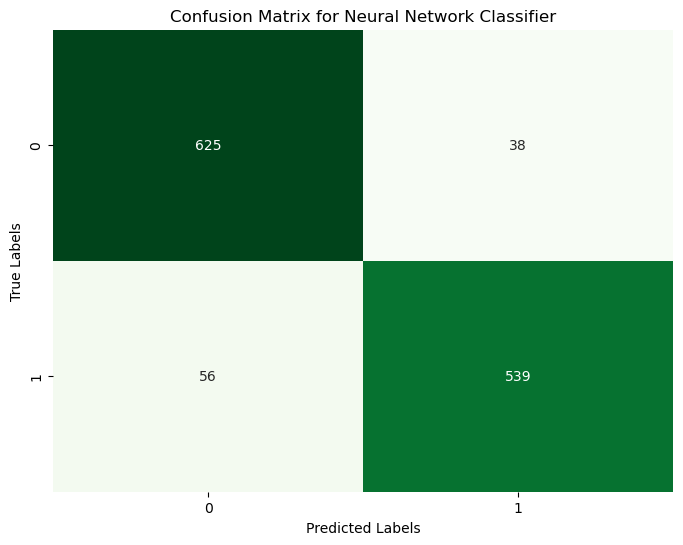

Confusion Matrix for Naive Bayes:
[[629  34]
 [ 51 544]]
Accuracy for Naive Bayes: 0.9324324324324325
F1 Score for Naive Bayes: 0.9275362318840579


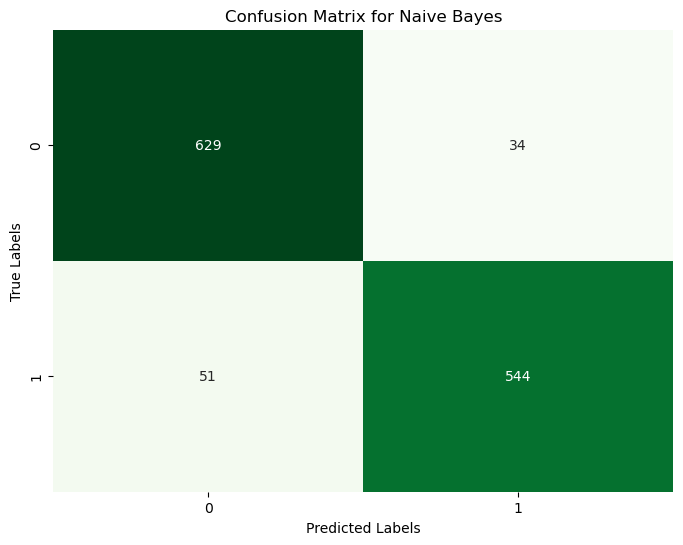

Confusion Matrix for SVC:
[[634  29]
 [ 65 530]]
Accuracy for SVC: 0.9252782193958664
F1 Score for SVC: 0.9185441941074524


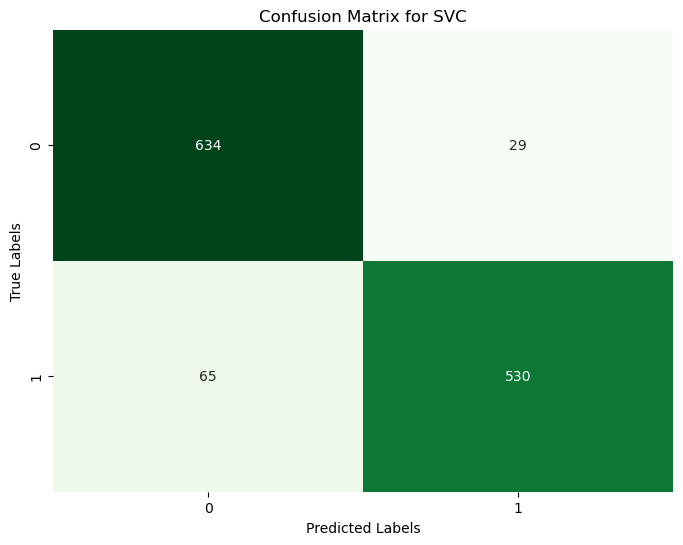

Confusion Matrix for Logistic Regression:
[[637  26]
 [ 67 528]]
Accuracy for Logistic Regression: 0.9260731319554849
F1 Score for Logistic Regression: 0.9190600522193211


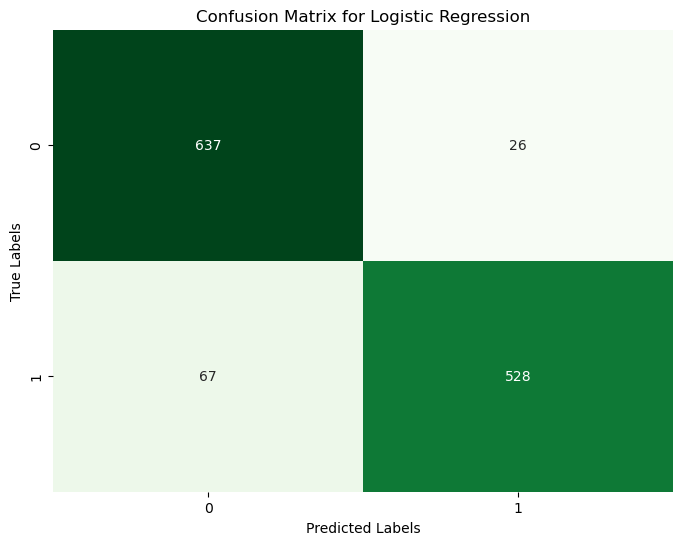

Confusion Matrix for Random Forest Classifier:
[[602  61]
 [ 37 558]]
Accuracy for Random Forest Classifier: 0.9220985691573926
F1 Score for Random Forest Classifier: 0.9192751235584844


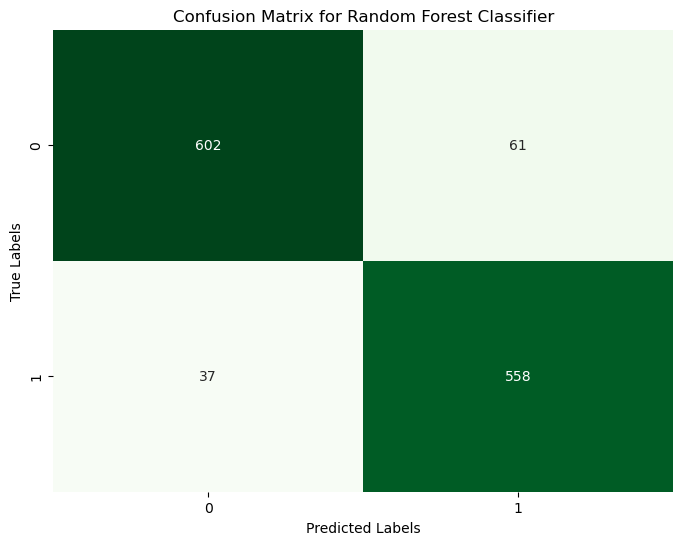

Confusion Matrix for Gradient Boosting Classifier:
[[631  32]
 [126 469]]
Accuracy for Gradient Boosting Classifier: 0.8744038155802861
F1 Score for Gradient Boosting Classifier: 0.8558394160583942


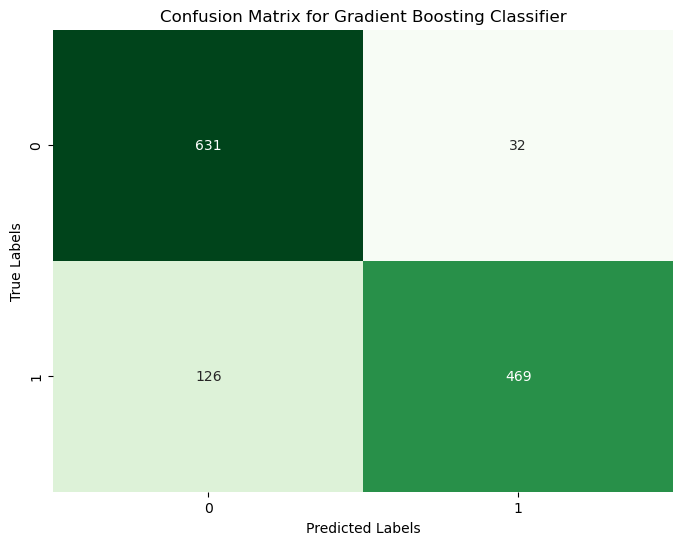

Confusion Matrix for Decision Tree Classifier:
[[527 136]
 [ 58 537]]
Accuracy for Decision Tree Classifier: 0.8457869634340223
F1 Score for Decision Tree Classifier: 0.8470031545741326


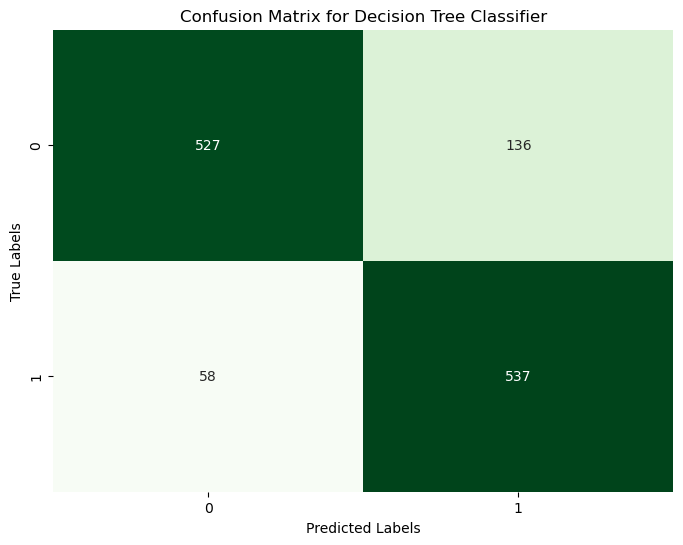

Confusion Matrix for KNN:
[[217 446]
 [106 489]]
Accuracy for KNN: 0.56120826709062
F1 Score for KNN: 0.6392156862745098


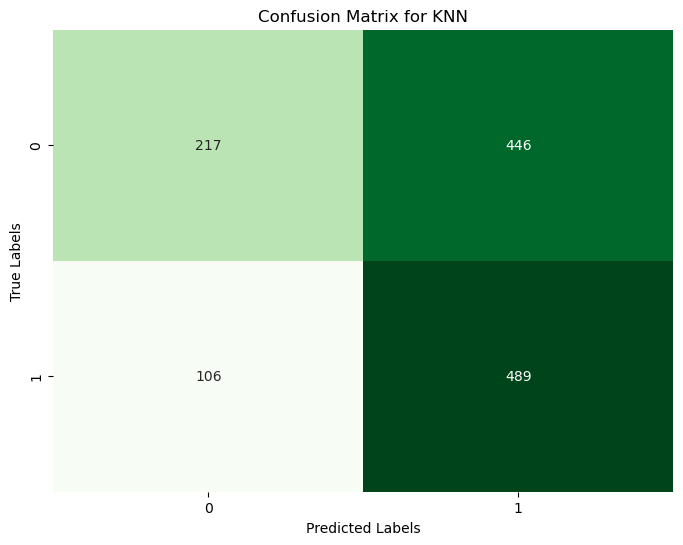

Confusion Matrix for AdaBoost Classifier:
[[614  49]
 [ 97 498]]
Accuracy for AdaBoost Classifier: 0.8839427662957074
F1 Score for AdaBoost Classifier: 0.87215411558669


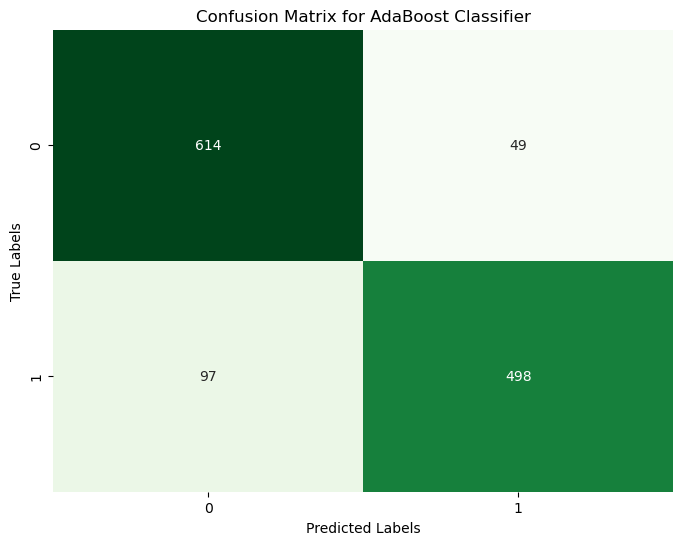

Confusion Matrix for Perceptron:
[[608  55]
 [ 66 529]]
Accuracy for Perceptron: 0.9038155802861685
F1 Score for Perceptron: 0.897370653095844


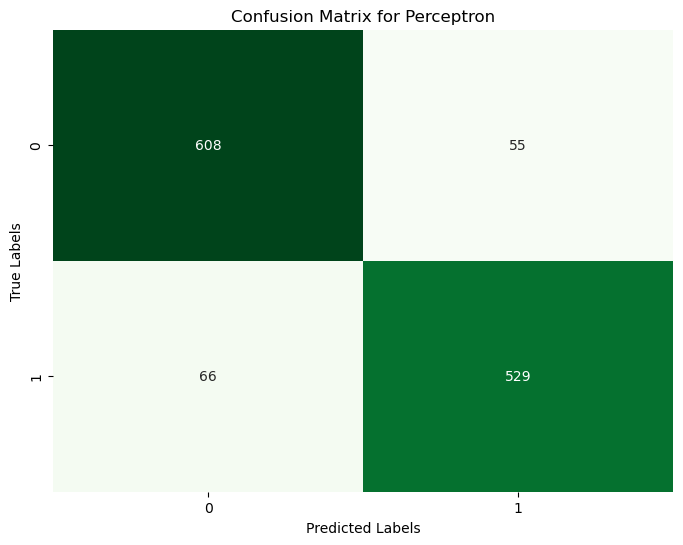

In [114]:


def plot_confusion_matrix(model, X_test, y_test, title):
    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Generate confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Print confusion matrix
    print(f"Confusion Matrix for {title}:")
    print(cm)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy for {title}: {accuracy}")

    # Calculate F1 score
    f1 = f1_score(y_test, y_pred)
    print(f"F1 Score for {title}: {f1}")

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, cmap='Greens', fmt='d', cbar=False)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(f'Confusion Matrix for {title}')
    plt.show()


# Define the models
models = [
    ('Neural Network Classifier', nnc_model),
    ('Naive Bayes', nb_model),
    ('SVC',svm_model),
    ('Logistic Regression',logReg),
    ('Random Forest Classifier',rf_model),
    ('Gradient Boosting Classifier',gbm_model),
    ('Decision Tree Classifier',dt_model),
    ('KNN',knn_model),
    ('AdaBoost Classifier',abc_model),
    ('Perceptron',preceptron_model)
]

# Iterate through the models and plot the confusion matrices
for model_name, model in models:
    plot_confusion_matrix(model, X_test_feature, y_test, model_name)


Application Phase

In [118]:

input_mail = ["spread option code change  zhiyang and zhiyun ,  vince told me that london has some trouble to calculate spread option  for correl = 1 , voll = vol 2 . in such a case , the effective volatility becomes  zero , and the option has zero time value .  i have modified the unitcorrpremium ( ) routine to force the code to treat  this situation as a special case . ( it returns the discounted intrinsic value ) .  please incorporate this chang to your code so that it will no longer cause  any  problems that should not happen in the first place .  if you have any questions , please let me know .  zimin  - - - - - - - - - - - - - - - - - - - - - - -  double unitcorrpremium (  double sl ,  double s 2 ,  double strike ,  double r ,  double ql ,  double q 2 ,  double voll ,  double vol 2 ,  double correl ,  double tmat ,  int opttype  )  {  double retval ;  if ( tmat < = 0 . 0 )  return intrinsic ( sl , s 2 , strike , opttype ) ;  / / look right here for the change , only two lines .  if ( ( 1 . 0 - correl ) < tiny &  setup ( sl , s 2 , strike , r , ql , q 2 , voll , vol 2 , correl , tmat ) ;  if ( opttype )  retval = s . disc * gauherint ( ffuncoc ) / sqrtpi ;  else  retval = s . disc * gauherint ( ffuncop ) / sqrtpi ;  return retval ;  }"]
input_datafeature=feature_extraction.transform(input_mail)
prediction = nb_model.predict(input_datafeature)
if prediction[0]==1:
    print('spam email')
else: print('Ham email')

Ham email


## Good Performing Algo:
## Naive Bayes:
Based on the evaluation metrics provided, it seems that the Naive Bayes algorithm performs the best on both the test and train data. It has high accuracy, precision, recall, and F1 score on the test data, indicating its effectiveness in classifying email spam.

The Naive Bayes algorithm is known for its simplicity and efficiency in handling text classification tasks like email spam detection. It assumes that the features (words or tokens) are conditionally independent given the class label, which makes it well-suited for modeling text data.

Therefore, Naive Bayes would be a good choice for email spam detection based on the given evaluation results. However, it's important to note that the choice of algorithm may also depend on other factors such as the size and characteristics of the dataset, computational resources, and specific requirements of the application.

## Why other Algo arent Performing good except naive bayes?


Other algorithms may not be performing as well as Naive Bayes for email spam detection due to several reasons:

## Logistic Regression: 
Logistic regression assumes a linear relationship between the input features and the output. If the relationship between the features and the target variable is non-linear, logistic regression may struggle to capture complex patterns and may result in lower performance.

## SVM (Support Vector Machines): 
SVMs work well with high-dimensional data and can handle non-linear relationships using kernel functions. However, SVMs may not perform as well if the dataset is imbalanced or if there is overlapping between the classes, which is often the case with email spam detection.

## Random Forest: 
Random Forests are ensemble models that combine multiple decision trees. They generally perform well on a wide range of problems, but for text classification tasks like email spam detection, they may not be as effective as other algorithms that can better handle the unique characteristics of text data.

## Gradient Boosting Machines: 
Gradient boosting algorithms like XGBoost and LightGBM are powerful and can handle complex relationships. However, in this case, the gradient boosting algorithm may be overfitting the training data, resulting in lower performance on the test data.

## Decision Tree: 
Decision trees are prone to overfitting if not properly regularized. It is possible that the decision tree is overfitting the training data, leading to lower performance on the test data.

## KNN (K-Nearest Neighbors): 
KNN relies on the proximity of data points in the feature space. If the feature space is high-dimensional or if the dataset is imbalanced, KNN may not perform well. Additionally, KNN is sensitive to the choice of the k value and distance metrics.

## Neural Network Classifier: 
Neural networks can be powerful models for various tasks, but they require careful tuning of hyperparameters and architecture design. If not properly configured or trained, neural networks can overfit the training data or struggle to generalize well to unseen data.

## AdaBoostClassifier: 
AdaBoost is an ensemble method that combines weak classifiers to form a strong classifier. If the weak classifiers in the ensemble are not diverse or if they individually perform poorly, the overall performance of AdaBoost can be affected.

## Perceptron: 
Perceptron is a simple linear classifier that can struggle with complex patterns and non-linear relationships. If the data has non-linear separability, the perceptron may not be able to accurately classify the instances.

## Conclusion
In summary, the performance of different algorithms can vary depending on the specific characteristics of the dataset and the task at hand. While Naive Bayes may be performing well for email spam detection due to its simplicity and suitability for text classification, other algorithms may not be as effective due to their limitations in handling non-linear relationships, imbalanced data, high-dimensional feature spaces, or overfitting.